In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRmXQVTR9SALYhCJR-RBGJUHubaZAqP0mBtTJ6TDjnulOBeL2JTbt9At7LYLZeLm9hHtn-Tolr7yZ3E/pub?gid=1325919676&single=true&output=csv')

In [ ]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

#sanity check-------------------------
print("Shape (rows, columns):", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())
#-------------------------------------


print("\nDataFrame info:")
df.info()

print("\nNumeric summary:")
display(df.describe())

print("\nAttrition value counts:")
print(df["Attrition"].value_counts())

print("\nAttrition rate (%):")
print(df["Attrition"].value_counts(normalize=True) * 100)

df["AttritionFlag"] = (df["Attrition"] == "Yes").astype(int)
print("\nCreated AttritionFlag (0 = stay, 1 = leave):")
print(df["AttritionFlag"].value_counts())

Shape (rows, columns): (1470, 44)

First 5 rows:


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,PerformanceIndex,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyAchievement,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,19479,8,Y,16,1,1,40,0,8,0,1,6,4,0,5,agent_B,0,1,5224,4,1,0,0,0,0,1,2023
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,24907,1,Y,7,4,4,40,1,10,3,3,10,7,1,7,intern,3431,3,6863,2,4,1,0,0,1,1,2023
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2396,6,Y,32,3,2,40,0,7,3,3,0,0,0,0,intern,0,2,7612,3,2,1,0,0,0,1,2023
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,23159,1,Y,28,1,3,40,0,8,3,3,8,7,3,0,intern,0,2,11245,1,4,1,1,1,1,1,2023
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,16632,9,Y,10,2,4,40,1,6,3,3,2,2,2,2,agent_C,0,2,3029,3,2,0,0,0,0,3,2023



Last 5 rows:


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,PerformanceIndex,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyAchievement,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,12290,4,Y,27,3,3,40,1,17,3,3,5,2,0,3,intern,0,5,5329,4,1,0,0,0,0,1,2023
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,21457,4,Y,37,3,1,40,1,9,5,3,7,7,1,7,intern,2458,1,5175,2,4,1,0,1,1,2,2024
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,5174,1,Y,14,4,2,40,1,6,0,3,6,2,0,3,intern,0,3,5828,3,1,0,0,0,0,3,2023
1468,49,No,Travel_Frequently,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,13243,2,Y,2,3,4,40,0,17,3,2,9,6,0,8,intern,0,2,9420,3,3,1,0,1,0,3,2023
1469,34,No,Travel_Rarely,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,10228,2,Y,14,2,1,40,0,6,3,4,4,3,1,2,intern,0,4,8379,3,3,1,0,0,1,3,2023



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  PerformanceIndex          1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,PerformanceIndex,JobInvolvement,JobLevel,JobSatisfaction,MonthlyAchievement,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Incentive,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.895238,9.236735,2.910204,1.0,1022.185034,2.721769,65.891156,2.729932,2.074830,2.728571,14313.103401,2.682993,15.330612,2.533333,2.712245,40.0,0.793878,11.253741,2.799320,2.761224,7.008163,4.231293,2.196599,4.123810,1142.874150,2.824490,6922.257143,2.499320,2.500000,0.596599,0.293878,0.252381,0.551020,2.104082,2023.200000
std,9.151321,8.129551,1.025259,0.0,602.769132,1.093082,20.329428,0.711561,1.109943,1.102846,7117.786044,2.498505,12.518178,0.991409,1.081209,0.0,0.852077,7.754327,1.289271,0.706476,6.110504,3.590639,3.214817,3.569734,1506.257621,1.229521,1977.100821,0.883052,1.131124,0.490747,0.455692,0.434526,0.497559,0.949750,0.400136
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,0.000000,1.000000,1.000000,40.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1329.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000
25%,30.000000,2.000000,2.000000,1.0,486.250000,2.000000,48.000000,2.000000,1.000000,2.000000,8047.000000,1.000000,5.000000,2.000000,2.000000,40.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,2.000000,5542.250000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000
50%,36.000000,7.000000,3.000000,1.0,1018.500000,3.000000,66.000000,3.000000,2.000000,3.000000,14235.500000,2.000000,13.000000,3.000000,3.000000,40.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,3.000000,6814.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2023.000000
75%,43.000000,14.000000,4.000000,1.0,1554.750000,4.000000,83.750000,3.000000,3.000000,4.000000,20461.500000,4.000000,24.000000,3.000000,4.000000,40.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,2394.250000,4.000000,8264.750000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2023.000000
max,60.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,26999.000000,9.000000,61.000000,4.000000,4.000000,40.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,6047.000000,5.000000,12612.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2024.000000



Attrition value counts:
Attrition
No     1232
Yes     238
Name: count, dtype: int64

Attrition rate (%):
Attrition
No     83.809524
Yes    16.190476
Name: proportion, dtype: float64

Created AttritionFlag (0 = stay, 1 = leave):
AttritionFlag
0    1232
1     238
Name: count, dtype: int64


In [ ]:
print("Missing values per column:")
display(df.isna().sum())

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("\nNumeric columns:")
print(numeric_cols)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:")
print(categorical_cols)

drop_cols = [
    "EmployeeCount",
    "EmployeeNumber",
    "Over18",
    "StandardHours",
    "Attrition"
]

df_clean = df.drop(columns=[c for c in drop_cols if c in df.columns])
print("\nAfter dropping unnecessary columns, shape:")
df_clean.shape

numeric_cols = df_clean.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print("\nUpdated numeric columns:")
print(numeric_cols)

print("\nUpdated categorical columns:")
print(categorical_cols)


Missing values per column:


,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0
EnvironmentSatisfaction,0



Numeric columns:
['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'PerformanceIndex', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyAchievement', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Incentive', 'RemoteWork', 'MonthlyIncome', 'StressRating', 'WelfareBenefits', 'InHouseFacility', 'ExternalFacility', 'ExtendedLeave', 'FlexibleWork', 'StressSelfReported', 'Year', 'AttritionFlag']

Categorical columns:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'HowToEmploy']

After dropping unnecessary columns, shape:

Updated numeric columns:
['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'PerformanceIndex', 'JobInv

Understanding Attrition Pattern

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df_eda = df_clean.copy()

Visualize Attrition Distribution

/tmp/ipython-input-2427206765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, x='AttritionFlag', palette='coolwarm')


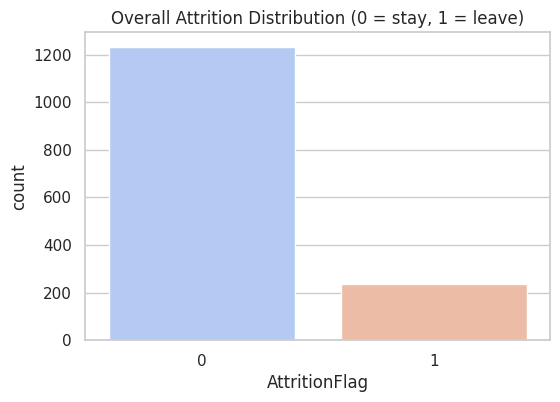


Attrition Rate (%):
AttritionFlag
0    83.809524
1    16.190476
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_eda, x='AttritionFlag', palette='coolwarm')
plt.title("Overall Attrition Distribution (0 = stay, 1 = leave)")
plt.show()

print("\nAttrition Rate (%):")
print(df_eda['AttritionFlag'].value_counts(normalize=True) * 100)

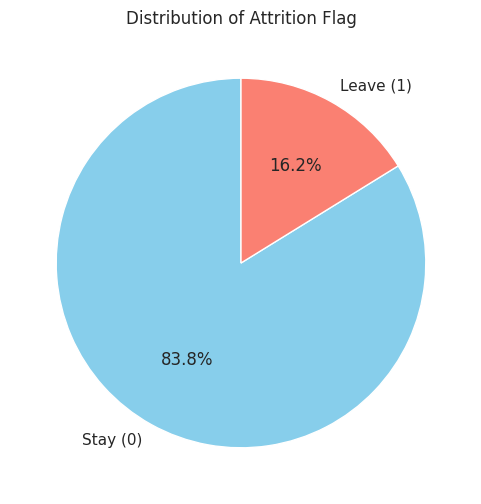

In [ ]:
attrition_counts = df_eda['AttritionFlag'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    attrition_counts,
    labels=['Stay (0)', 'Leave (1)'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon']
)
plt.title("Distribution of Attrition Flag")
plt.show()

/tmp/ipython-input-2517281358.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_attr.index, y=dept_attr.values, palette='coolwarm')


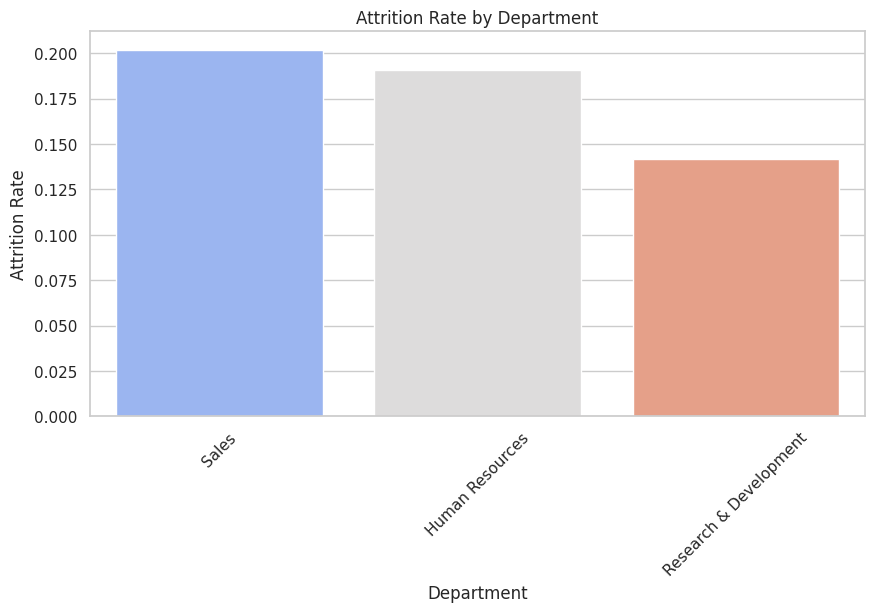

,AttritionFlag
Department,
Sales,0.201794
Human Resources,0.190476
Research & Development,0.141519


In [ ]:
plt.figure(figsize=(10,5))
dept_attr = (
    df_eda.groupby('Department')['AttritionFlag']
    .mean()
    .sort_values(ascending=False)
)

sns.barplot(x=dept_attr.index, y=dept_attr.values, palette='coolwarm')
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.show()

display(dept_attr)

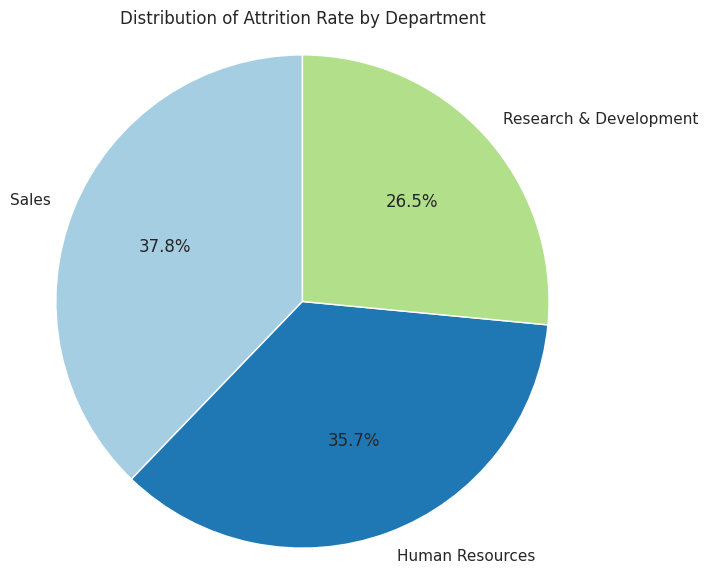

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(
    dept_attr.values,
    labels=dept_attr.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title("Distribution of Attrition Rate by Department")
plt.axis('equal')
plt.show()

/tmp/ipython-input-1646215317.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_attr.index, y=job_attr.values, palette='coolwarm')


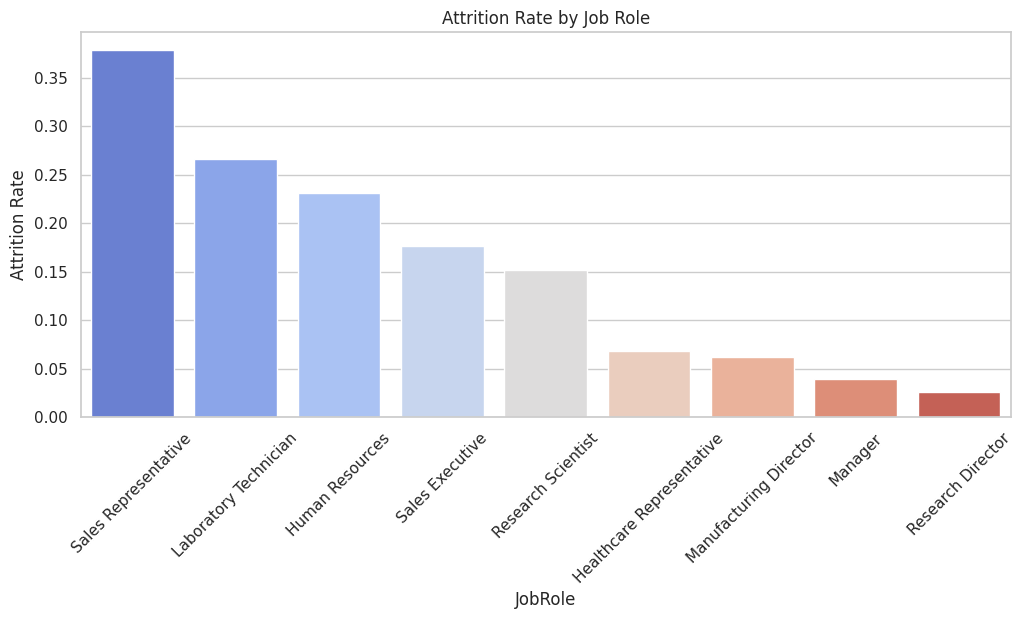

,AttritionFlag
JobRole,
Sales Representative,0.378049
Laboratory Technician,0.266409
Human Resources,0.230769
Sales Executive,0.176829
Research Scientist,0.151203
Healthcare Representative,0.067669
Manufacturing Director,0.062069
Manager,0.039604
Research Director,0.025316


In [ ]:
plt.figure(figsize=(12,5))
job_attr = (
    df_eda.groupby('JobRole')['AttritionFlag']
    .mean()
    .sort_values(ascending=False)
)

sns.barplot(x=job_attr.index, y=job_attr.values, palette='coolwarm')
plt.title("Attrition Rate by Job Role")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.show()

display(job_attr)

/tmp/ipython-input-2941243975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stress_attr.index, y=stress_attr.values, palette='coolwarm')


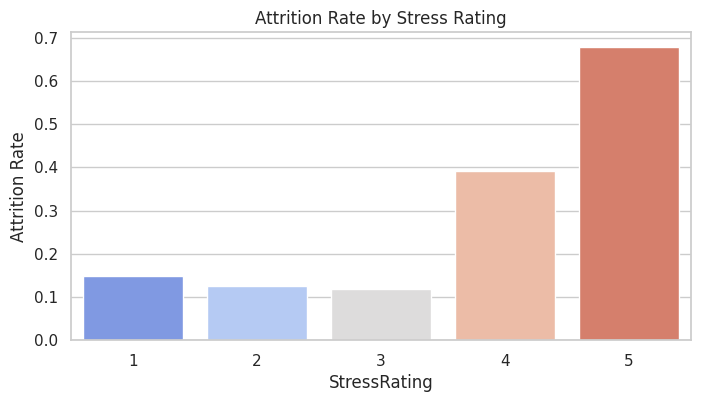

,AttritionFlag
StressRating,
1,0.148148
2,0.126023
3,0.117871
4,0.391608
5,0.678571


In [ ]:
plt.figure(figsize=(8,4))
stress_attr = df_eda.groupby('StressRating')['AttritionFlag'].mean()

sns.barplot(x=stress_attr.index, y=stress_attr.values, palette='coolwarm')
plt.title("Attrition Rate by Stress Rating")
plt.ylabel("Attrition Rate")
plt.show()

display(stress_attr)

/tmp/ipython-input-1476512439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


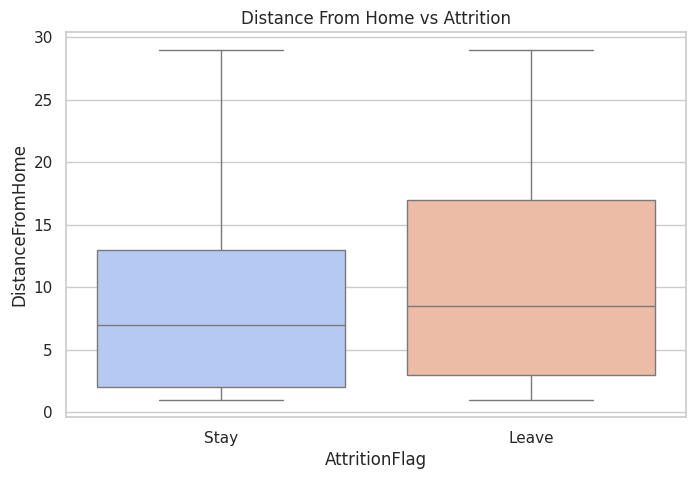

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_eda,
    x='AttritionFlag',
    y='DistanceFromHome',
    palette='coolwarm'
)
plt.title("Distance From Home vs Attrition")
plt.xticks([0, 1], ["Stay", "Leave"])
plt.show()

/tmp/ipython-input-1156787290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


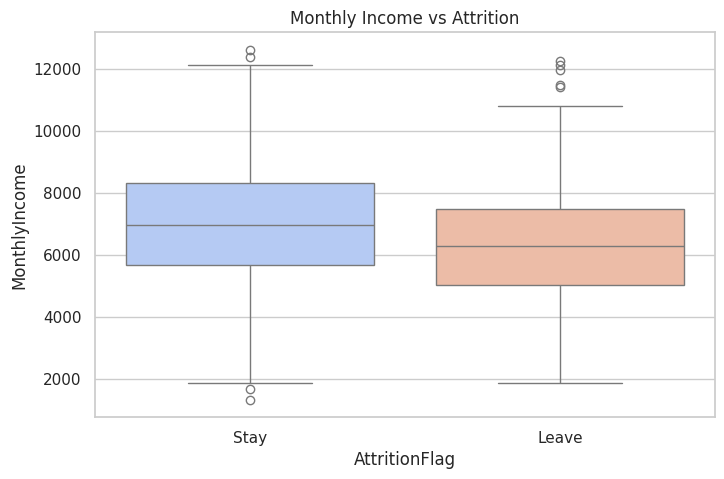

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_eda,
    x='AttritionFlag',
    y='MonthlyIncome',
    palette='coolwarm'
)
plt.title("Monthly Income vs Attrition")
plt.xticks([0, 1], ["Stay", "Leave"])
plt.show()

/tmp/ipython-input-3890102816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overtime_attrition, x='OverTime', y='AttritionFlag', palette='coolwarm')


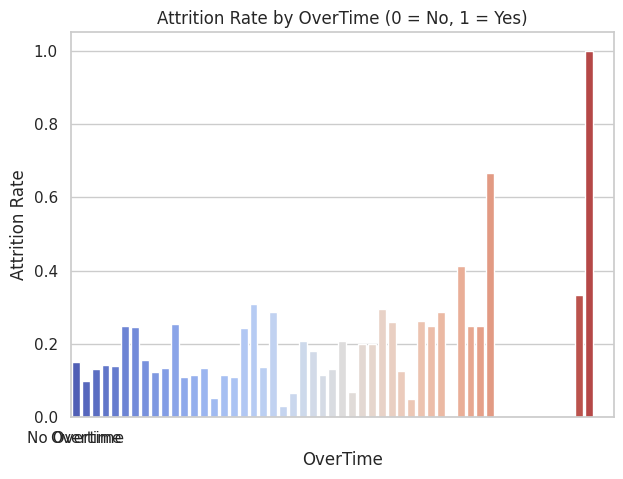

,OverTime,AttritionFlag
0,0,0.150000
1,1,0.100000
2,2,0.132353
3,3,0.142857
4,4,0.140625
5,5,0.250000
6,6,0.245614
7,7,0.156863
8,8,0.122807
9,9,0.135135


In [ ]:
plt.figure(figsize=(7, 5))
overtime_attrition = df_eda.groupby('OverTime')['AttritionFlag'].mean().reset_index()

sns.barplot(data=overtime_attrition, x='OverTime', y='AttritionFlag', palette='coolwarm')
plt.title("Attrition Rate by OverTime (0 = No, 1 = Yes)")
plt.xlabel("OverTime")
plt.ylabel("Attrition Rate")
plt.xticks([0, 1], ['No Overtime', 'Overtime'])
plt.show()

display(overtime_attrition)

/tmp/ipython-input-1156787290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


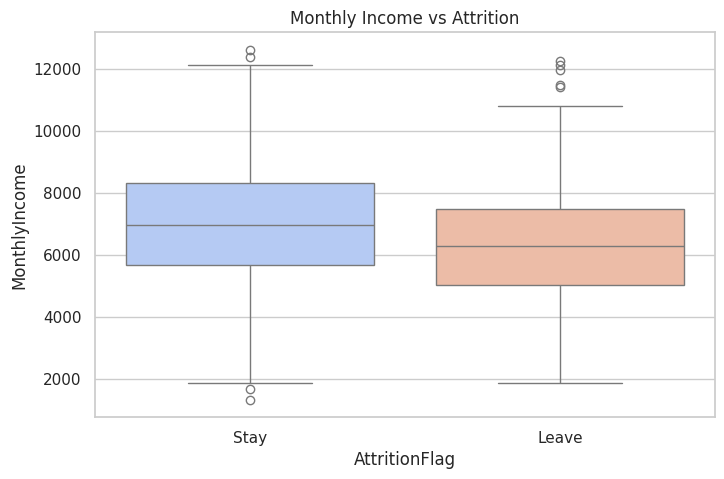

/tmp/ipython-input-395081861.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years_at_company_attr.index, y=years_at_company_attr.values, palette='coolwarm')


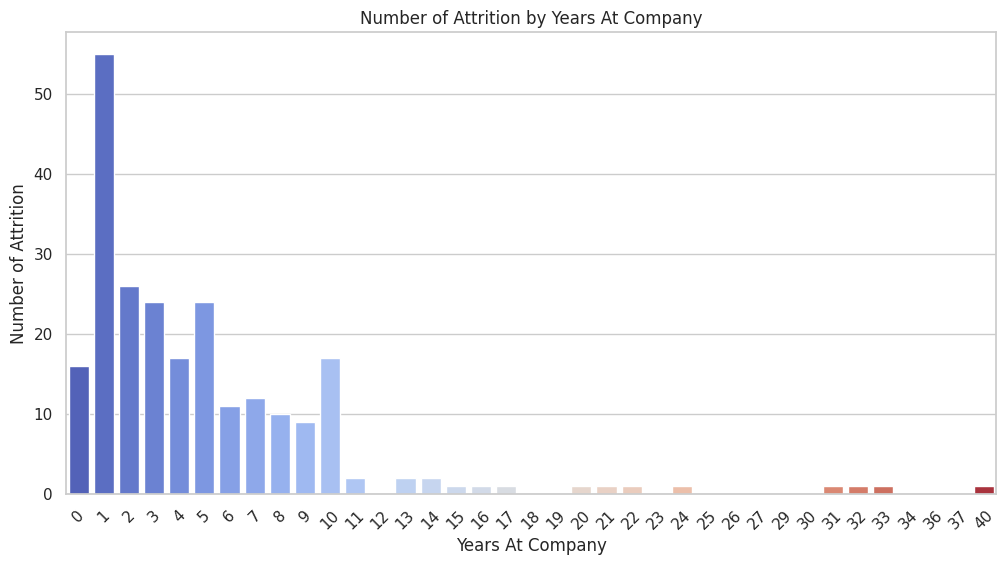

,AttritionFlag
YearsAtCompany,
1,55
2,26
3,24
5,24
4,17
10,17
0,16
7,12
6,11


In [38]:
plt.figure(figsize=(12, 6))
years_at_company_attr = (
    df_eda.groupby('YearsAtCompany')['AttritionFlag']
    .sum()
    .sort_values(ascending=False)
)
sns.barplot(x=years_at_company_attr.index, y=years_at_company_attr.values, palette='coolwarm')
plt.title("Number of Attrition by Years At Company")
plt.xlabel("Years At Company")
plt.ylabel("Number of Attrition")
plt.xticks(rotation=45)
plt.show()

display(years_at_company_attr)

Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split

y = df_eda["AttritionFlag"]

X = df_eda.drop(columns=["AttritionFlag"])

print("X shape:", X.shape)
print("y shape:", y.shape)

numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("\nNumeric columns:")
print(numeric_cols)

print("\nCategorical columns:")
print(categorical_cols)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("\nTrain/Test shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X shape: (1470, 39)
y shape: (1470,)

Numeric columns:
['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'PerformanceIndex', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyAchievement', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Incentive', 'RemoteWork', 'MonthlyIncome', 'StressRating', 'WelfareBenefits', 'InHouseFacility', 'ExternalFacility', 'ExtendedLeave', 'FlexibleWork', 'StressSelfReported', 'Year']

Categorical columns:
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'HowToEmploy']

Train/Test shapes:
X_train: (1176, 39)
X_test: (294, 39)
y_train: (1176,)
y_test: (294,)


In [ ]:
print(X_test.head())

      Age BusinessTravel              Department  DistanceFromHome  Education    EducationField  \
1393   27  Travel_Rarely                   Sales                 9          3         Marketing   
1034   45  Travel_Rarely  Research & Development                20          3           Medical   
962    51  Travel_Rarely         Human Resources                 5          3     Life Sciences   
156    51  Travel_Rarely  Research & Development                 7          4           Medical   
780    28     Non-Travel  Research & Development                24          2  Technical Degree   

      EnvironmentSatisfaction Gender  PerformanceIndex  JobInvolvement  JobLevel                    JobRole  \
1393                        4   Male                44               3         2            Sales Executive   
1034                        2   Male                95               1         3  Healthcare Representative   
962                         3   Male                84               3  

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_transformer = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)

numeric_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

preprocessor


ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['Age', 'DistanceFromHome', 'Education',
                                  'EnvironmentSatisfaction', 'PerformanceIndex',
                                  'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction', 'MonthlyAchievement',
                                  'NumCompaniesWorked', 'OverTime',
                                  'PerformanceRating',
                                  'RelationshipSatisfaction',
                                  'StockOptionLevel', 'TotalWorkingYears',
                                  'TrainingTimesLastYear', 'Work...
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager', 'Incentive',
                                  'RemoteWork', 'MonthlyIncome', 'StressRating',
                                  'WelfareBenefits', 'InHouseFacility',
                                  'ExternalFacility', 'ExtendedLeave',
                                  'FlexibleWork', ...]),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus', 'HowToEmploy'])])

ROC-AUC: 0.790

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       246
           1       0.32      0.73      0.45        48

    accuracy                           0.70       294
   macro avg       0.63      0.71      0.62       294
weighted avg       0.83      0.70      0.74       294

Confusion Matrix:
[[172  74]
 [ 13  35]]


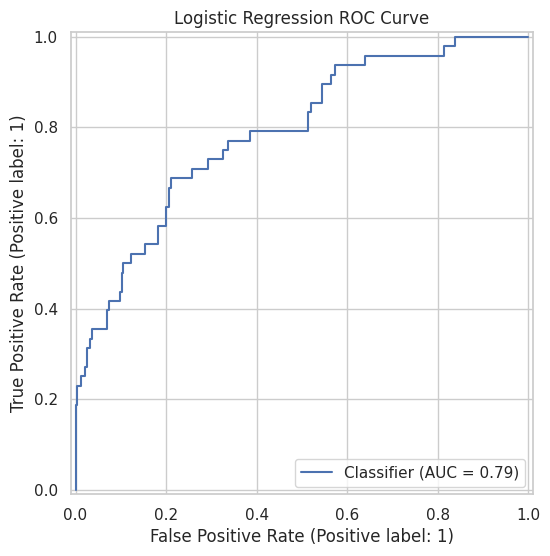

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

log_reg_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        n_jobs=-1
    ))
])


log_reg_clf.fit(X_train, y_train)

y_proba = log_reg_clf.predict_proba(X_test)[:, 1]
y_pred = log_reg_clf.predict(X_test)

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Logistic Regression ROC Curve")
plt.show()


Random Forest ROC-AUC: 0.800

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       246
           1       0.75      0.12      0.21        48

    accuracy                           0.85       294
   macro avg       0.80      0.56      0.57       294
weighted avg       0.84      0.85      0.80       294

Confusion Matrix:
[[244   2]
 [ 42   6]]


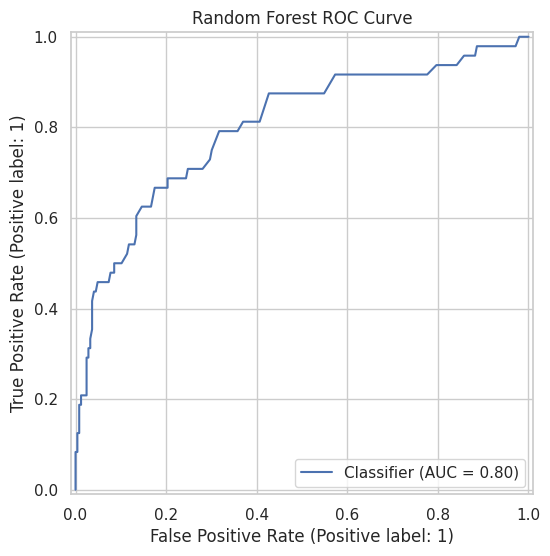

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rf_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

rf_clf.fit(X_train, y_train)

rf_proba = rf_clf.predict_proba(X_test)[:, 1]
rf_pred = rf_clf.predict(X_test)

print(f"Random Forest ROC-AUC: {roc_auc_score(y_test, rf_proba):.3f}\n")

print("Classification Report:")
print(classification_report(y_test, rf_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

RocCurveDisplay.from_predictions(y_test, rf_proba)
plt.title("Random Forest ROC Curve")
plt.show()





Top 20 Most Important Features (Random Forest):


,feature,importance
21,Incentive,0.074051
23,MonthlyIncome,0.055131
0,Age,0.051305
14,TotalWorkingYears,0.044340
8,MonthlyAchievement,0.042349
6,JobLevel,0.040213
24,StressRating,0.038939
10,OverTime,0.037140
4,PerformanceIndex,0.035888
17,YearsAtCompany,0.035644


/tmp/ipython-input-3738366781.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


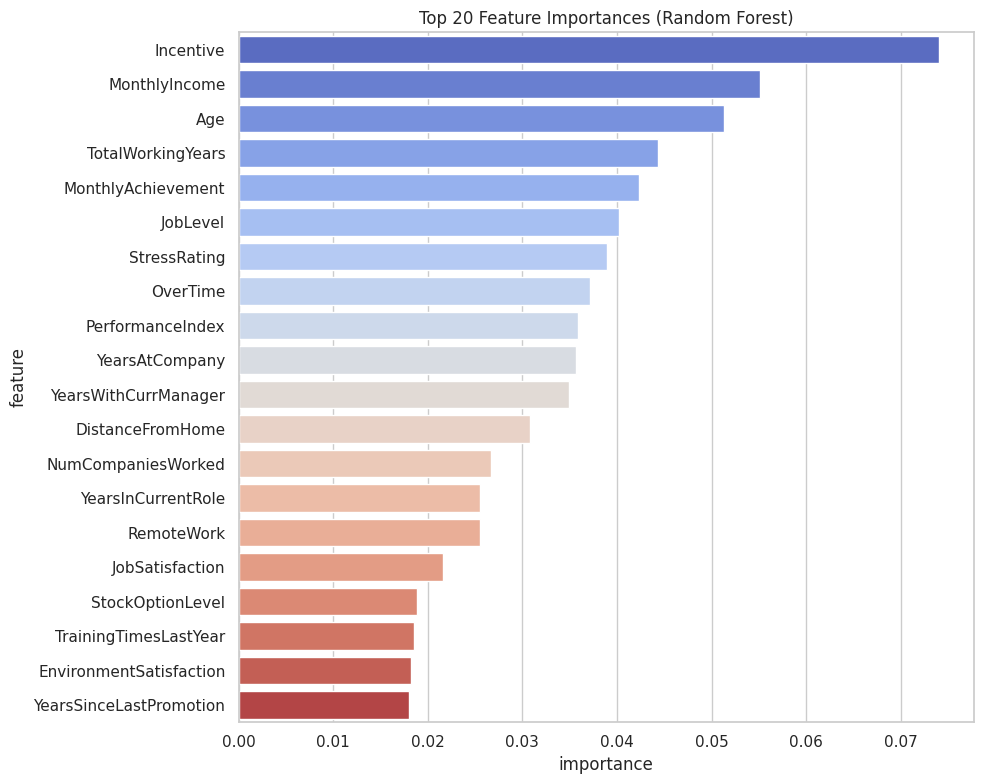

In [ ]:
ohe = rf_clf.named_steps['preprocess'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_cols)

all_feature_names = np.concatenate([numeric_cols, cat_feature_names])

importances = rf_clf.named_steps['model'].feature_importances_
importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("\nTop 20 Most Important Features (Random Forest):")
display(importance_df.head(20))

plt.figure(figsize=(10,8))
sns.barplot(
    data=importance_df.head(20),
    x='importance',
    y='feature',
    palette='coolwarm'
)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Model comparison:


,model,roc_auc,precision_pos,recall_pos,f1_pos
0,LogisticRegression,0.789549,0.321101,0.729167,0.445860
1,RandomForest,0.800305,0.750000,0.125000,0.214286


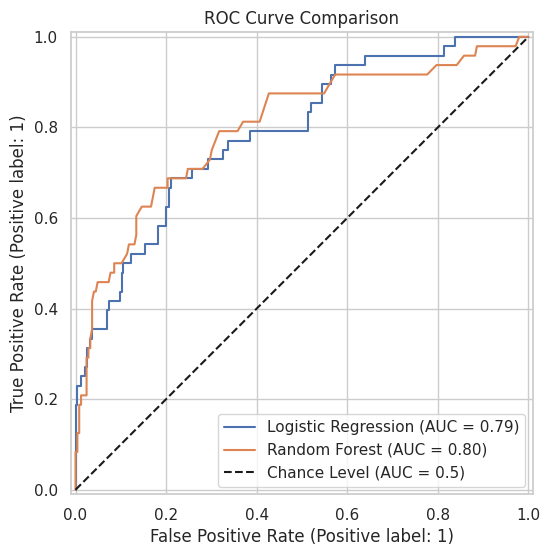

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt

def model_summary(name, y_true, y_pred, y_proba):
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='binary'
    )
    roc = roc_auc_score(y_true, y_proba)
    return {
        "model": name,
        "roc_auc": roc,
        "precision_pos": precision,
        "recall_pos": recall,
        "f1_pos": f1
    }

results = []
results.append(model_summary("LogisticRegression", y_test, y_pred, y_proba))
results.append(model_summary("RandomForest", y_test, rf_pred, rf_proba))

results_df = pd.DataFrame(results)
print("Model comparison:")
display(results_df)

plt.figure(figsize=(8, 6))
ax = plt.gca()

RocCurveDisplay.from_predictions(y_test, y_proba, name='Logistic Regression', ax=ax)
RocCurveDisplay.from_predictions(y_test, rf_proba, name='Random Forest', ax=ax)

plt.title("ROC Curve Comparison")
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level (AUC = 0.5)')
plt.legend()
plt.show()

In [ ]:

import numpy as np
from sklearn.metrics import precision_recall_fscore_support

thresholds = np.arange(0.2, 0.71, 0.05)

rows = []
for thr in thresholds:
    y_thr = (y_proba >= thr).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_thr, average='binary'
    )
    rows.append({
        "threshold": thr,
        "precision_pos": precision,
        "recall_pos": recall,
        "f1_pos": f1
    })

thr_df = pd.DataFrame(rows)
print("Threshold tuning for Logistic Regression (positive class = leaver):")
display(thr_df)

Threshold tuning for Logistic Regression (positive class = leaver):


,threshold,precision_pos,recall_pos,f1_pos
0,0.20,0.208145,0.958333,0.342007
1,0.25,0.227273,0.937500,0.365854
2,0.30,0.240223,0.895833,0.378855
3,0.35,0.240506,0.791667,0.368932
4,0.40,0.269504,0.791667,0.402116
5,0.45,0.284615,0.770833,0.415730
6,0.50,0.321101,0.729167,0.445860
7,0.55,0.366667,0.687500,0.478261
8,0.60,0.371429,0.541667,0.440678
9,0.65,0.452830,0.500000,0.475248


In [ ]:
import pandas as pd

THRESHOLD = 0.55

def predict_risk(model, employee_row, threshold=THRESHOLD):
    if not isinstance(employee_row, pd.DataFrame):
        employee_row = pd.DataFrame([employee_row])

    prob = model.predict_proba(employee_row)[0][1]
    label = int(prob >= threshold)

    if prob >= 0.60:
        risk = "HIGH RISK"
    elif prob >= 0.40:
        risk = "MEDIUM RISK"
    else:
        risk = "LOW RISK"

    return {
        "probability_of_attrition": prob,
        "predicted_label": label,
        "risk_level": risk
    }




In [ ]:
import pandas as pd

THRESHOLD = 0.55

def predict_risk(model, employee_row, threshold=THRESHOLD):
    if not isinstance(employee_row, pd.DataFrame):
        employee_row = pd.DataFrame([employee_row])

    prob = model.predict_proba(employee_row)[0][1]
    label = int(prob >= threshold)

    if prob >= 0.60:
        risk = f"HIGH RISK"
    elif prob >= 0.40:
        risk = f"MEDIUM RISK"
    else:
        risk = f"LOW RISK"

    return {
        "probability_of_attrition": prob,
        "predicted_label": label,
        "risk_level": risk
    }

In [ ]:
random_employee_df = X_test.sample(1)

print("Sample random employee data:")
display(random_employee_df)

print(f"\n--- Random Employee ---")
print("Predicted risk (Logistic Regression):")
print(predict_risk(log_reg_clf, random_employee_df))

print("Predicted risk (Random Forest):")
print(predict_risk(rf_clf, random_employee_df))

Sample random employee data:


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,PerformanceIndex,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyAchievement,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
1194,47,Travel_Rarely,Sales,2,4,Life Sciences,2,Female,47,4,4,Manager,2,Divorced,21086,6,19,3,3,3,29,2,3,3,2,1,2,intern,4527,2,9532,3,1,0,0,0,0,1,2023



--- Random Employee ---
Predicted risk (Logistic Regression):
{'probability_of_attrition': np.float64(0.03617692666271411), 'predicted_label': 0, 'risk_level': 'LOW RISK'}
Predicted risk (Random Forest):
{'probability_of_attrition': np.float64(0.06333333333333334), 'predicted_label': 0, 'risk_level': 'LOW RISK'}


/tmp/ipython-input-3175289156.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=risk_df, x='Risk Level', order=['LOW RISK', 'MEDIUM RISK', 'HIGH RISK'], palette={'LOW RISK': 'green', 'MEDIUM RISK': 'orange', 'HIGH RISK': 'red'})


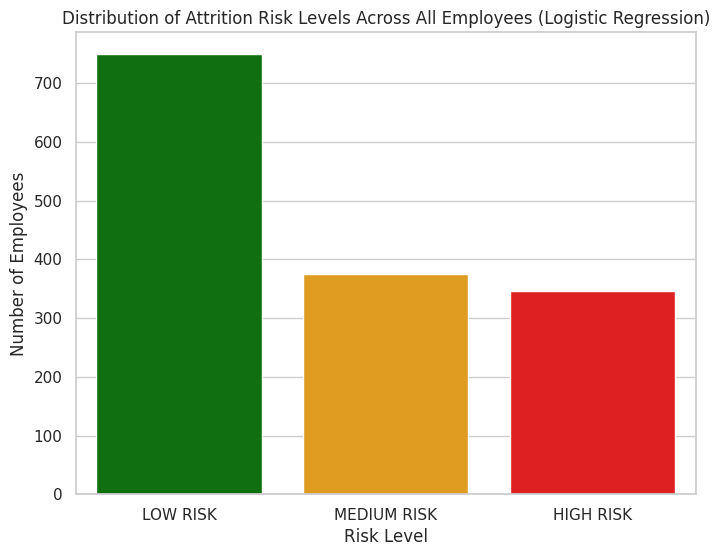


Counts of each risk level:


,count
Risk Level,
LOW RISK,749
MEDIUM RISK,375
HIGH RISK,346


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

risk_levels = []
for index, employee_data in X.iterrows():
    prediction = predict_risk(log_reg_clf, employee_data)
    clean_risk_level = re.sub(r'\x1b\[[0-9;]*m', '', prediction['risk_level'])
    risk_levels.append(clean_risk_level)

risk_df = pd.DataFrame({'Risk Level': risk_levels})

plt.figure(figsize=(8, 6))
sns.countplot(data=risk_df, x='Risk Level', order=['LOW RISK', 'MEDIUM RISK', 'HIGH RISK'], palette={'LOW RISK': 'green', 'MEDIUM RISK': 'orange', 'HIGH RISK': 'red'})
plt.title('Distribution of Attrition Risk Levels Across All Employees (Logistic Regression)')
plt.ylabel('Number of Employees')
plt.show()

print("\nCounts of each risk level:")
display(risk_df['Risk Level'].value_counts())


In [ ]:
X["RiskLevel"] = risk_df["Risk Level"]

summary = (
    df.assign(RiskLevel=risk_df["Risk Level"])
      .groupby("RiskLevel")["AttritionFlag"]
      .agg(["mean", "count", "sum"])
      .rename(columns={"mean": "ActualAttritionRate (%)", "count": "Employees", "sum": "ActualLeavers"})
)

summary


,ActualAttritionRate (%),Employees,ActualLeavers
RiskLevel,,,
HIGH RISK,0.439306,346,152
LOW RISK,0.053405,749,40
MEDIUM RISK,0.122667,375,46


In [42]:
avg_salary = df['MonthlyIncome'].mean() * 12
replacement_cost_per_person = avg_salary * 0.5

high_risk_count = (risk_df['Risk Level'] == "HIGH RISK").sum()

retained_people = high_risk_count * 0.30
estimated_savings = retained_people * replacement_cost_per_person

print(f"Avg annual salary: ${avg_salary:,.0f}")
print(f"Replacement cost each: ${replacement_cost_per_person:,.0f}")
print(f"High-risk employees: {high_risk_count}")
print(f"People saved: ~{retained_people:.0f}")
print(f"Estimated 1-year savings: ${estimated_savings:,.0f}")


Avg annual salary: $83,067
Replacement cost each: $41,534
High-risk employees: 346
People saved: ~104
Estimated 1-year savings: $4,311,182


/tmp/ipython-input-3521196064.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=['salmon', 'mediumseagreen'])


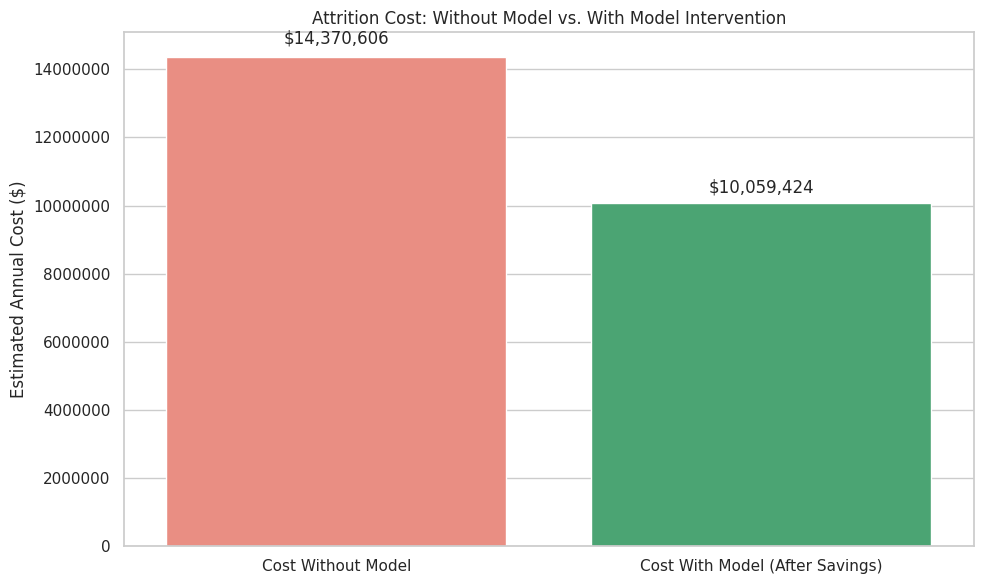

In [40]:
cost_without_model = high_risk_count * replacement_cost_per_person

cost_with_model = cost_without_model - estimated_savings

labels = ['Cost Without Model', 'Cost With Model (After Savings)']
values = [cost_without_model, cost_with_model]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette=['salmon', 'mediumseagreen'])
plt.title('Attrition Cost: Without Model vs. With Model Intervention')
plt.ylabel('Estimated Annual Cost ($)')
plt.ticklabel_format(style='plain', axis='y')

for i, v in enumerate(values):
    plt.text(i, v + (v * 0.02), f'${v:,.0f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()
